# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Funciones para lectura y concatenado

In [2]:
# Función para generar strings con nombres de los ficheros cambiando el identificador del año 
def filelist(st1,st2,n1,n2):
    filelist = []
    for n in range(n1,n2):
        if n < 10:
            filename = st1 + '0' + str(n) + st2
            filelist.append(filename)
        else: 
            filename = st1 + str(n) + st2
            filelist.append(filename)
    return filelist

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
# Función para concatenar los ficheros de los distintos años en un sólo fichero
def concatenated_df(df_list):
    df_temp = pd.DataFrame()
    for file in df_list:
        df = pd.read_csv(file)
        if df_temp.shape == (0,0):
            df_temp = df
        else: 
            df_temp = pd.concat([df_temp,df])
    return df_temp

In [4]:
# Listas con los ficheros de cada tipo que contienen datos de todos los años
d_filelist = filelist('Files/esudb','d.csv',4,19) # Ficheros información geográfica año 2004 - 2018
h_filelist = filelist('Files/esudb','h.csv',4,19) # Ficheros información del hogar año 2004 - 2018
p_filelist = filelist('Files/esudb','p.csv',4,19) # Ficheros información de la persona año 2004 - 2018

In [5]:
%%time
df_D = concatenated_df(d_filelist)

CPU times: user 469 ms, sys: 500 ms, total: 969 ms
Wall time: 956 ms


In [6]:
%%time
df_H = concatenated_df(h_filelist)

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (49,75,79,89) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (101) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (3,9,73,79,95,97,99,101,111,113,123) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (7,9,13,15,17,19,21,23,51,77,85,87,89,95,97,99,101,103,105,109,111,113,115,117,121,123,125,127,133,142,144,145,146,148,150,152,154,156,158,160,162,166,172,176) have mixed types.Sp

CPU times: user 48.6 s, sys: 12 s, total: 1min
Wall time: 1min 1s


In [7]:
%%time
df_P = concatenated_df(p_filelist)

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (31,39,43,57,59,61,63,65,67,99,101,103,105,107,109,111,113,115,121,125) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (9,23,31,43,57,59,61,63,65,67,91,93,95,97,99,101,103,105,107,109,111,113,115,121,125) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (5,23,31,39,43,57,59,61,63,65,67,91,93,95,97,99,115) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (11,23,25,31,39,43,97,99,

CPU times: user 2min 31s, sys: 36.1 s, total: 3min 7s
Wall time: 3min 8s


# Limpieza y selección de variables fichero D / Sociodemográficos


### Diccionario de variables seleccionadas y códigos asociados:

| Variable    | Descripción  |  Categoría   | Código  |
| ----------- | -------------| -------------| --------|
| **DB010**    | **Año** | - |-|
| **DB030**    | **Identificación del hogar** | - |-|
| **DB040**    | **Región** | Galicia |ES11|
| | |Principado de Asturias | ES12 |
| | |Cantabria   | ES13 |
| | |País Vasco  | ES21 |
| | |Comunidad Foral de Navarra | ES22 |
| | |La Rioja    | ES23 |
| | |Aragón      | ES24 |
| | |Comunidad de Madrid    | ES30 |
| | |Castilla y León      | ES24 |
| | |Comunidad de Madrid | 	ES30 |
| | |Castilla y León | ES41 |
| | |Castilla-La Mancha	| ES42 |
| | |Extremadura | ES43 |
| | |Cataluña | ES51 |
| | |Comunidad Valenciana | ES52 |
| | |Illes Balears | ES53 |
| | |Andalucía | ES61 |
| | |Región de Murcia | ES62 |
| | |Ciudad Autónoma de Ceuta | ES63 |
| | |Ciudad Autónoma de Melilla | ES64 |
| | |Canarias | ES70 |
| | |Extra-Regio | ESZZ |
| **DB100** | **Habitat** | Grande | 1	|
| | |Mediano| 2 |
| | |Pequeño| 3 |

In [8]:
print(df_D.shape)
df_D.head()

(196498, 11)


,DB010,DB020,DB030,DB040,DB040_F,DB060,DB060_F,DB090,DB090_F,DB100,DB100_F
0,2004,ES,1,ES21,1,1,1,997.96215,1,3,1
1,2004,ES,2,ES21,1,1,1,1001.89779,1,3,1
2,2004,ES,3,ES21,1,1,1,1105.30224,1,3,1
3,2004,ES,4,ES21,1,1,1,319.55250,1,3,1
4,2004,ES,5,ES21,1,1,1,2817.80555,1,3,1


In [9]:
# Selección de variables
dfD_varlist = ['DB010','DB030','DB040','DB100']

# Filtrado de columnas 
df_D1 = df_D[dfD_varlist]

# Cambio de nombre de las variables
df_D1.rename(columns = {'DB030':'HHId','DB010': 'Year','DB040': 'Region',\
                             'DB100': 'Habitat'}, inplace = True)

# Creación de un ID año + ID del hogar para evitar duplicaciones entre los ids de distintos años
df_D1['Year_HHid'] = df_D1['Year'].astype(str) + '_' + df_D1['HHId'].astype(str)

# Cambio de códigos de CCAA por definición de la categoría

df_D1['Region'] = df_D1['Region'].map({'ES11':'Galicia','ES12':'Principado de Asturias','ES13':'Cantabria','ES21':'País Vasco',
                     'ES22':'Comunidad Foral de Navarra','ES23':'La Rioja','ES24':'Aragón','ES30':'Comunidad de Madrid',
                     'ES24':'Castilla y León','ES30':'Comunidad de Madrid','ES41':'Castilla y León','ES42':'Castilla-La Mancha',
                     'ES43':'Extremadura','ES51':'Cataluña','ES52':'Comunidad Valenciana','ES53':'Illes Balears',
                     'ES61':'Andalucía','ES62':'Región de Murcia','ES63':'Ciudad Autónoma de Ceuta',
                     'ES64':'Ciudad Autónoma de Melilla','ES70':'Canarias','ESZZ':'Extra-Regio'})


# Cambio de códigos para el tamaño del hábitat por definición de la categoría
df_D1['Habitat']= df_D1['Habitat'].map({1: 'Big', 2 : 'Medium', 3 : 'Small' }) 

# Tamaño del dataframe una vez aplicados los cambios
print(df_D1.shape)
df_D1.head()

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(196498, 5)


/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Year,HHId,Region,Habitat,Year_HHid
0,2004,1,País Vasco,Small,2004_1
1,2004,2,País Vasco,Small,2004_2
2,2004,3,País Vasco,Small,2004_3
3,2004,4,País Vasco,Small,2004_4
4,2004,5,País Vasco,Small,2004_5


# Limpieza y selección de variables fichero H / Datos del hogar


### Diccionario de variables seleccionadas y códigos asociados:

| Variable    | Descripción  |  Categoría   | Código  |
| ----------- | -------------| -------------| --------|
| **HB010**    | **Año** | - |-|
| **HB030**    | **Identificación del hogar** | - | - |
| **HB040**    | **Posibilidad de irse de vacaciones anualmente** |Sí | 1 |
| | |No | 2 |
| **HS050**    | **Posibilidad de comer alimentos cárnicos dos veces por semana** |Sí | 1 |
| | |No | 2 |
| **HS060**    | **Fondo de reserva económico** |Sí | 1 |
| | |No | 2 |
| **HS070**    | **Disponibilidad de teléfono en el hogar** |Sí | 1 |
| | |No | 2 |
| **HS080**    | **Disponibilidad de televisión en el hogar** |Sí | 1 |
| | |No | 2 |
| **HS090**    | **Disponibilidad de ordenador en el hogar** |Sí | 1 |
| | |No | 2 |
| **HS100**    | **Disponibilidad de lavadora en el hogar** |Sí | 1 |
| | |No | 2 |
| **HS110**    | **Disponibilidad de coche en el hogar** |Sí | 1 |
| | |No | 2 |
| **HS120**    | **Capacidad para llegar a fin de mes** |Sí | 1 |
| | |No | 2 |
| **HS140**    | **Impacto de los gastos del hogar** |Sí | 1 |
| | |No | 2 |
| **HH050**    | **Capacidad de poner / calentar la casa en invierno** |Sí | 1 |
| | |No | 2 |
| **HX040**    | **Número de miembros del hogar** | - |-|
| **HX240**    | **Número de unidades de consumo** | - |-|
| **vhRentaa**    | **Renta** | - |-|
| **vhRentaAIa**    | **Renta** | - |-|
| **vhPobreza**    | **Hogar bajo el umbral de la pobreza** | - |-|
| **vhMATDEP**    | **Hogar en carencia material severa** | - |-|


In [22]:
# Selección de variables
dfH_varlist = ['HB010','HB030','HS040','HS050','HS060','HS070','HS080','HS090','HS100','HS110',
               'HS120', 'HS140','HH050','HX040','HX240','vhRentaa','vhRentaAIa','vhPobreza','vhMATDEP']

# Filtrado de columnas 
df_H1  = df_H[dfH_varlist]

# Cambio de nombre de las variables
df_H1.rename(columns = {'HB010':'Year','HB030': 'HHId', 'HS040':'HHHolidays','HS050':'HHFood', 
                             'HS060':'HHReserves','HS070':'HHPhone', 'HS080':'HHTV','HS090':'HHComputer', 
                             'HS100':'HHWashMachine', 'HS110': 'HHCar','HS120':'AREMonth', 'HS140':'HousingCost',
                             'HH050':'HHHeath', 'HX040':'HHnMembers','HX060':'HHType', 'HX240' : 'HHConsUnits'}, inplace = True)

# Creación de un ID año + ID del hogar para evitar duplicaciones entre los ids de distintos años
df_H1['Year_HHid'] = df_H1['Year'].astype(str) + '_' + df_H1['HHId'].astype(str)

# Función para convertir a float las variable de renta y y otras que deberían ser numéricas
def to_numeric(x):
    if type(x) is str:
        x = x.lstrip()
        if not x:
            return np.NaN
        else:
            return float(x)
    else: 
        return x

# Aplicación de la función to_numeric a renta y dificultad para llegar a fin de mes
df_H1['vhRentaa'] = df_H1['vhRentaa'].apply(to_numeric)
df_H1['vhRentaAIa'] = df_H1['vhRentaAIa'].apply(to_numeric)
df_H1['AREMonth'] = df_H1['AREMonth'].apply(to_numeric)

df_H1['vhPobreza'] =  df_H1['vhPobreza'].apply(lambda x: 'vhPobreza_Yes' if x == '1'\
                                                              else 'vhPobreza_No' if x == '0' else 'Unknown / Not Declared')

df_H1['vhMATDEP'] =  df_H1['vhMATDEP'].apply(lambda x: 'vhMATDEP_Yes' if x == '1'\
                                                              else 'vhMATDEP_No')

df_H1['HousingCost'] = df_H1['HousingCost'].apply(lambda x: 'HighImpactHH' if x == '1' \
                                                            else 'MediumImpactHH' if x == '2' \
                                                            else 'LowImpactHH' if x == '3' else 'Unknown / Not Declared')

# Función para sustituir los valores de privación marterial
def HHDepriv(x):
    if x == '1':
        return 'Yes'
    elif x == '2':
        return 'No '
    else:
        return 'Unknown / Not Declared'

# Lista de variables de privación material   

list_depriv = ['HHFood','HHHolidays','HHReserves','HHPhone','HHTV','HHComputer',
              'HHWashMachine','HHCar','HHHeath']
    
df_H1[list_depriv] = df_H1[list_depriv].applymap(lambda s: HHDepriv(s)).head()    
    

df_H1.head()

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Year,HHId,HHHolidays,HHFood,HHReserves,HHPhone,HHTV,HHComputer,HHWashMachine,HHCar,AREMonth,HousingCost,HHHeath,HHnMembers,HHConsUnits,vhRentaa,vhRentaAIa,vhPobreza,vhMATDEP,Year_HHid
0,2004,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,MediumImpactHH,Yes,3,1.8,40821.0,44829.02,vhPobreza_No,vhMATDEP_No,2004_1
1,2004,2,No,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,2.0,HighImpactHH,Yes,1,1.0,5068.0,7665.90,vhPobreza_Yes,vhMATDEP_No,2004_2
2,2004,3,Yes,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Yes,4.0,MediumImpactHH,Yes,2,1.3,23040.0,25637.90,vhPobreza_No,vhMATDEP_No,2004_3
3,2004,4,Yes,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Yes,4.0,MediumImpactHH,Yes,2,1.5,20020.0,23545.62,vhPobreza_No,vhMATDEP_No,2004_4
4,2004,5,Yes,Yes,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,5.0,MediumImpactHH,Yes,1,1.0,7510.0,10938.46,vhPobreza_No,vhMATDEP_No,2004_5


# Fusión de las variables de dfH y dfD

In [23]:
dfHH = df_H1.merge(df_D1, left_on = ['Year_HHid','Year','HHId'], right_on = ['Year_HHid','Year','HHId'], how = 'outer')
print(dfHH.shape)
dfHH.head()

(196498, 22)


,Year,HHId,HHHolidays,HHFood,HHReserves,HHPhone,HHTV,HHComputer,HHWashMachine,HHCar,AREMonth,HousingCost,HHHeath,HHnMembers,HHConsUnits,vhRentaa,vhRentaAIa,vhPobreza,vhMATDEP,Year_HHid,Region,Habitat
0,2004,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,MediumImpactHH,Yes,3,1.8,40821.0,44829.02,vhPobreza_No,vhMATDEP_No,2004_1,País Vasco,Small
1,2004,2,No,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,2.0,HighImpactHH,Yes,1,1.0,5068.0,7665.90,vhPobreza_Yes,vhMATDEP_No,2004_2,País Vasco,Small
2,2004,3,Yes,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Yes,4.0,MediumImpactHH,Yes,2,1.3,23040.0,25637.90,vhPobreza_No,vhMATDEP_No,2004_3,País Vasco,Small
3,2004,4,Yes,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Yes,4.0,MediumImpactHH,Yes,2,1.5,20020.0,23545.62,vhPobreza_No,vhMATDEP_No,2004_4,País Vasco,Small
4,2004,5,Yes,Yes,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,5.0,MediumImpactHH,Yes,1,1.0,7510.0,10938.46,vhPobreza_No,vhMATDEP_No,2004_5,País Vasco,Small


# Limpieza y selección de variables fichero P / Datos de la persona


### Diccionario de variables seleccionadas y códigos asociados:


| Variable    | Descripción  |  Categoría   | Código  |
| ----------- | -------------| -------------| --------|
| **PB010**   | **Año** | - |-|
| **PB030**   | **ID del Individuo** | - |-|
| **PPB150**  | **Sexo** |Hombre | 1 |
|  |  | Mujer | 2 |
| **PPB140**  | **Año de nacimiento** | - |-|
| **PB190**  | **Estado Civil** | Soltero/a |1|
|  |  | Casado/a | 2 |
|  |  | Separado/a | 3 |
|  |  | Viudo/a | 4 |
|  |  | Divorciado/a | 5 |
| **PL031**  | **Estado Laboral** | Asalariado a tiempo completo | 1 |
|  |  | Asalariado a tiempo parcial | 2 |
|  |  | Trabajador por cuenta propia a tiempo completo | 3 |
|  |  | Trabajador por cuenta propia a tiempo parcial | 4 |
|  |  | Parado | 5 |
|  |  | Estudiante, escolar o en formación | 6 |
|  |  | Jubilado, retirado, jubilado anticipado o ha cerrado un negocio | 7 |
|  |  | Incapacitado permanente para trabaja | 8 |
|  |  | Servicio militar obligatorio o prestación social sustitutoria | 9 |
|  |  | Dedicado a las labores del hogar, al cuidado de niños u otras personas | 10 |
|  |  | Otra clase de inactividad económica | 11 |
| **PE040**  | **Nivel máximo de estudios finalizados** | Menos que primaria |000|
|  |  | Educación primaria | 100 |
|  |  | Primera etapa de Educación Secundaria | 200 |
|  |  | Segunda etapa de Educación Secundaria | 300 |
|  |  | Orientación general 	344 | 344 |
|  |  | Orientación profesional (sin acceso directo a educación superior) | 353 |
|  |  | Orientación profesional (con acceso directo a educación superior) | 354 |
|  |  | Educación postsecundaria no superior | 400 |
|  |  | Orientación profesional | 450 |
|  |  | Educación superior | 500 |
| **PH010**  | **Valoración estado de salud** | Muy buena  | 1 |
|  |  | Buena | 2 |
|  |  | Normal | 3 |
|  |  | Mala | 4 |
|  |  | Muy mala | 4 |
| **PH020**  | **Enfermedades crónicas** | Sí | 1 |
|  |  | No | 2 |
| **PH030**  | **Limitaciones en la vida díaria últimos 6 meses** | Seriamente limitado | 1 |
|  |  | Limitado, pero no seriamente | 2 |
|  |  | No limitado | 3 |
| **PD020**  | **Posibilidad de comprar ropa** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PD030**  | **Posibilidad de comprar zapatos** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PD050**  | **Posibilidad de salir y reunirse con amigos** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PD060**  | **Posibilidad de realizar actividades de ocio** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PD070**  | **Posibilidad de gastar dinero en lo que a uno le gusta** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PD080**  | **Posibilidad de tener conexión a internet** | Sí |1|
|  |  | No, porque no me lo puedo permitir | 2 |
|  |  | No, por otras razones | 3 |
| **PW050T** | **Frecuencia se ha sentido tenso** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW050T** | **Frecuencia se ha sentido tenso** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW060T** | **Frecuencia se ha sentido bajo de moral** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW070T** | **Frecuencia se ha sentido calmado** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW080T** | **Frecuencia se ha sentido deprimido** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW090T** | **Frecuencia se ha sentido feliz** | Siempre |1|  
|  |  | Frecuentemente | 2 |
|  |  | Algunas veces | 3 |
|  |  | Casi nunca | 3 |
|  |  | Nunca | 3 |
| **PW010T** | **Satisfacción con la vida** | - |-| 
| **PW030** | **Satisfacción con las relaciones personales** | - |-|
| **PW120T** | **Satisfacción con el tiempo que dedica a sí mismo** | - |-|
| **PW160T** | **Satisfacción con su economía** | - |-|  

In [24]:
# Las variables de "Felicidad" o "Satisfacción con la vida" tienen distinto nombre en 2013 por lo que sustituímos los valores
cods_2018 = ['PW010T','PW030T','PW050T','PW060T','PW070T','PW080T','PW090T','PW100T','PW120T','PW160T','PW190T']# Códigos asisgnados a las variables en 2018
cods_2013 = ['PW010','PW030','PW050','PW060','PW070','PW080','PW090','PW100','PW120','PW160','PW190'] # Códigos asisgnados a las variables en 2013

# Sustituimos los valores NaN de 2013 por los correspondientes a los códigos de preguntas de ese años
df_P[df_P['PB010']== 2013][cods_2018]= df_P[df_P['PB010']== 2013][cods_2013]

dfP_varlist = ['PB010', 'PB030','PB150','PB140','PB190','PL031','PE040','PH010','PH020','PH030', 
               'PD020','PD030','PD050','PD060','PD070','PD080', 'PW050T','PW060T','PW070T','PW080T','PW090T',
               'PW010T','PW030T','PW120T','PW160T']

df_P1 = df_P[dfP_varlist]

df_P1.rename(columns = {'PB010':'Year','PB030':'IndID','PB150':'Sex','PB140':'YBirht','PB190':'MarStatus',
                       'PL031': 'WorStatus', 'PE040':'FStudies','PH010':'CHealth',
                       'PH020':'CrConditions','PH030':'HLimitations', 'PD020':'MDClothes','PD030':'MDShoes', 'PD050':'MDFriends',
                       'PD060':'MDLeisure', 'PD070':'MDSelf','PD080':'MDInternet',                  
                       'PW050T':'FFTense','PW060T':'FFDown','PW070T':'FFCalm','PW080T':'FFDepressed','PW090T':'FFHappy',
                       'PW010T':'WSOovsat','PW030T':'WBSrelations','PW120T':'WBSowntime','PW160T':'WSBeconomy'}, 
                        inplace = True)

# Household Id
# El identificador del individuo lleva asociado el código del hogar. El identificador del individuo son los dos últimos dígitos
# de el Id del individuo y el resto es el Id de su hogar
df_P1['HHId'] = df_P1['IndID'].apply(lambda x: str(x)[:-2]).astype(int)

# Generamos un código único por individuo y año y repetimos la operación por hogar, aunque en el caso del hogar los IDs estarán
# repetidos para las personas que conformen la misma unidad
df_P1['Year_HHid'] = df_P1['Year'].astype(str) + '_'+ df_P1['HHId'].astype(str)
df_P1['Year_IndID'] = df_P1['Year'].astype(str) + '_'+ df_P1['IndID'].astype(str)

# Conversión variable género
df_P1['Sex'] = df_P1['Sex'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')

# Conversión año de nacimiento en edad
df_P1['AgeNumeric'] = df_P1['Year'] - df_P1['YBirht']

# Convertimos la variable de condiciones de salud en numérica, que si bien es categórica es ordinal 
df_P1['CHealth'] = df_P1['CHealth'].apply(to_numeric)

# Conversión variable género
df_P1['CrConditions'] = df_P1['CrConditions'].apply(lambda x: 'NChronic' if x == '2'\
                                                              else 'YChronic' if x == '1' else 'Unknown / Not Declared')

# Conversión variable género
df_P1['HLimitations'] = df_P1['HLimitations'].apply(lambda x: 'SerLimited' if x == '1'\
                                                              else 'NoSerLimitedG_limitado' if x == '2' \
                                                              else 'NoLimited' if x == '3' else 'Unknown / Not declared')


# Lista de variables de felicidad  
list_happines = ['FFTense','FFDown','FFCalm','FFDepressed','FFHappy','WSOovsat','WBSrelations','WBSowntime','WSBeconomy']
    
df_P1[list_happines] = df_P1[list_happines].applymap(lambda s: to_numeric(s)) 


# Marital status
def civilstate(x):
    if x == '1': 
        return 'Soltero'
    elif x == '2':
        return 'Casado'
    elif x == '3': 
        return 'Separado'
    elif x == '4': 
        return 'Viudo'
    elif x == '5':
        return 'Divorciado'
    else:
        return 'Uknown / Prefer not to say'

# Conversión variable estado civil
df_P1['MarStatus'] = df_P1['MarStatus'].apply(civilstate)    
    
# Studies
def studiesF(x):
    if x == '000': 
        return '<Primaria'
    elif x == '100':
        return 'Primaria'
    elif x == '200': 
        return 'Secundaria1'
    elif x == '300': 
        return 'Secundaria2'
    elif x == '344':
        return 'OrGeneral'
    elif x == '353' or x == '354':
        return 'OrProfesional'
    elif x == '400':
        return 'SecundariaNoOb'
    elif x == '450':
        return 'OrProfesional'
    elif x == '500':
        return 'EdSuperior'
    else:
        return 'Uknown'
    
# Conversión variable estudios
df_P1['FStudies'] = df_P1['FStudies'].apply(studiesF)    
    
# Workign Status
def workingStatus(x):
    if x == '1': 
        return 'EmployeeFT'
    elif x == '2':
        return 'EmployeePT'
    elif x == '3': 
        return 'SEmployedFT'
    elif x == '4': 
        return 'SEmployedPT'
    elif x == '5':
        return 'Unemployed'
    elif x == '6':
        return 'Student'
    elif x == '7':
        return 'Retired'
    elif x == '9':
        return 'NotAble'
    elif x == '10':
        return 'HHoldKeeper'
    elif x == '11':
        return 'OtherNonWorking'
    else:
        return 'Uknown / Not declared'    

# Conversión estatus del laboral
df_P1['WorStatus'] = df_P1['WorStatus'].apply(workingStatus)


# Privación material personal
def MatDepriv(x):
    if x == '1':
        return 'Yes'
    elif x == '2':
        return 'No affordable'
    elif x == '3': 
        return 'No, other reason'
    else:
        return 'Unknown / Not Declared'

    
list_pdepriv = ['MDClothes','MDShoes','MDFriends','MDLeisure','MDSelf','MDInternet']
    
df_P1[list_pdepriv] = df_P1[list_pdepriv].applymap(lambda s: MatDepriv(s)) 


df_P1.tail()

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Year,IndID,Sex,YBirht,MarStatus,WorStatus,FStudies,CHealth,CrConditions,HLimitations,MDClothes,MDShoes,MDFriends,MDLeisure,MDSelf,MDInternet,FFTense,FFDown,FFCalm,FFDepressed,FFHappy,WSOovsat,WBSrelations,WBSowntime,WSBeconomy,HHId,Year_HHid,Year_IndID,AgeNumeric
28367,2018,1851202,Mujer,1971,Casado,EmployeeFT,EdSuperior,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,10.0,10.0,8.0,10.0,18512,2018_18512,2018_1851202,47
28368,2018,1851203,Hombre,2001,Soltero,Student,Secundaria1,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,10.0,10.0,10.0,10.0,18512,2018_18512,2018_1851203,17
28369,2018,1851301,Mujer,1973,Viudo,EmployeePT,Secundaria1,2.0,NChronic,NoLimited,Yes,Yes,Yes,"No, other reason",No affordable,Yes,4.0,4.0,2.0,4.0,1.0,8.0,5.0,5.0,10.0,18513,2018_18513,2018_1851301,45
28370,2018,1851302,Mujer,1998,Soltero,Unemployed,Secundaria1,1.0,NChronic,NoLimited,Yes,Yes,Yes,"No, other reason",Yes,Yes,5.0,5.0,1.0,5.0,1.0,8.0,5.0,8.0,10.0,18513,2018_18513,2018_1851302,20
28371,2018,1851303,Hombre,1999,Soltero,Unemployed,OrGeneral,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,8.0,5.0,8.0,10.0,18513,2018_18513,2018_1851303,19


# Fusión de las variables de dfHH y df_P1:
#### Datos de la persona y datos del hogar

In [25]:
df_P1.shape

(436818, 29)

In [26]:
dfFinal = dfHH.merge(df_P1, left_on = ['Year_HHid','Year','HHId'], right_on = ['Year_HHid','Year','HHId'], how = 'outer')
print(dfFinal.shape)
dfFinal.tail()

(436818, 48)


,Year,HHId,HHHolidays,HHFood,HHReserves,HHPhone,HHTV,HHComputer,HHWashMachine,HHCar,AREMonth,HousingCost,HHHeath,HHnMembers,HHConsUnits,vhRentaa,vhRentaAIa,vhPobreza,vhMATDEP,Year_HHid,Region,Habitat,IndID,Sex,YBirht,MarStatus,WorStatus,FStudies,CHealth,CrConditions,HLimitations,MDClothes,MDShoes,MDFriends,MDLeisure,MDSelf,MDInternet,FFTense,FFDown,FFCalm,FFDepressed,FFHappy,WSOovsat,WBSrelations,WBSowntime,WSBeconomy,Year_IndID,AgeNumeric
436813,2018,18512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Unknown / Not Declared,NaN,5,2.8,71015.40,77682.03,Unknown / Not Declared,vhMATDEP_No,2018_18512,Ciudad Autónoma de Melilla,Big,1851202,Mujer,1971,Casado,EmployeeFT,EdSuperior,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,10.0,10.0,8.0,10.0,2018_1851202,47
436814,2018,18512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Unknown / Not Declared,NaN,5,2.8,71015.40,77682.03,Unknown / Not Declared,vhMATDEP_No,2018_18512,Ciudad Autónoma de Melilla,Big,1851203,Hombre,2001,Soltero,Student,Secundaria1,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,10.0,10.0,10.0,10.0,2018_1851203,17
436815,2018,18513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Unknown / Not Declared,NaN,5,2.8,14925.59,14925.59,Unknown / Not Declared,vhMATDEP_No,2018_18513,Ciudad Autónoma de Melilla,Big,1851301,Mujer,1973,Viudo,EmployeePT,Secundaria1,2.0,NChronic,NoLimited,Yes,Yes,Yes,"No, other reason",No affordable,Yes,4.0,4.0,2.0,4.0,1.0,8.0,5.0,5.0,10.0,2018_1851301,45
436816,2018,18513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Unknown / Not Declared,NaN,5,2.8,14925.59,14925.59,Unknown / Not Declared,vhMATDEP_No,2018_18513,Ciudad Autónoma de Melilla,Big,1851302,Mujer,1998,Soltero,Unemployed,Secundaria1,1.0,NChronic,NoLimited,Yes,Yes,Yes,"No, other reason",Yes,Yes,5.0,5.0,1.0,5.0,1.0,8.0,5.0,8.0,10.0,2018_1851302,20
436817,2018,18513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Unknown / Not Declared,NaN,5,2.8,14925.59,14925.59,Unknown / Not Declared,vhMATDEP_No,2018_18513,Ciudad Autónoma de Melilla,Big,1851303,Hombre,1999,Soltero,Unemployed,OrGeneral,1.0,NChronic,NoLimited,Yes,Yes,Yes,Yes,Yes,Yes,5.0,5.0,1.0,5.0,1.0,8.0,5.0,8.0,10.0,2018_1851303,19


# Generar dummies

In [29]:
list(dfFinal.columns)

['Year',
 'HHId',
 'HHHolidays',
 'HHFood',
 'HHReserves',
 'HHPhone',
 'HHTV',
 'HHComputer',
 'HHWashMachine',
 'HHCar',
 'AREMonth',
 'HousingCost',
 'HHHeath',
 'HHnMembers',
 'HHConsUnits',
 'vhRentaa',
 'vhRentaAIa',
 'vhPobreza',
 'vhMATDEP',
 'Year_HHid',
 'Region',
 'Habitat',
 'IndID',
 'Sex',
 'YBirht',
 'MarStatus',
 'WorStatus',
 'FStudies',
 'CHealth',
 'CrConditions',
 'HLimitations',
 'MDClothes',
 'MDShoes',
 'MDFriends',
 'MDLeisure',
 'MDSelf',
 'MDInternet',
 'FFTense',
 'FFDown',
 'FFCalm',
 'FFDepressed',
 'FFHappy',
 'WSOovsat',
 'WBSrelations',
 'WBSowntime',
 'WSBeconomy',
 'Year_IndID',
 'AgeNumeric']

In [36]:
dummyList = [ 
 'Year',
 'IndID', 
 'HHHolidays',
 'HHFood',
 'HHReserves',
 'HHPhone',
 'HHTV',
 'HHComputer',
 'HHWashMachine',
 'HHCar',
 'HousingCost',
 'HHHeath',
 'vhPobreza',
 'vhMATDEP',
 'Sex',
 'MarStatus',
 'WorStatus',
 'FStudies',
 'CrConditions',
 'HLimitations',
 'MDClothes',
 'MDShoes',
 'MDFriends',
 'MDLeisure',
 'MDSelf',
 'MDInternet'    
]

In [43]:
dfFinal_dummies = dfFinal[dummyList]

dfFinal_dummies = pd.get_dummies(dfFinal_dummies)

dfFinal = dfFinal.merge(dfFinal_dummies, left_on =['Year','IndID'], right_on = ['Year','IndID'])

# Creación de variables para predecir:
#### Datos de la persona y datos del hogar

In [46]:
# Test the los datos
pg.cronbach_alpha(data = dfFinal[['WBSrelations','WBSowntime','WSBeconomy','WSOovsat']])

(0.7132275192615884, array([0.712, 0.715]))

In [44]:
correraltions = dfFinal[['WBSrelations','WBSowntime','WSBeconomy','WSOovsat']].corr()['WSOovsat'][:-1]

In [45]:
dfFinal[['WBSrelations','WBSowntime','WSBeconomy','WSOovsat']].corr()

,WBSrelations,WBSowntime,WSBeconomy,WSOovsat
WBSrelations,1.000000,0.306376,0.309757,0.585005
WBSowntime,0.306376,1.000000,0.367203,0.345667
WSBeconomy,0.309757,0.367203,1.000000,0.478247
WSOovsat,0.585005,0.345667,0.478247,1.000000


In [49]:
# Indicador 1 - Media aritmética
dfFinal['LifeSatisfaction0'] = (dfFinal['WBSrelations'] + dfFinal['WBSowntime'] \
                         + dfFinal['WSBeconomy'] + dfFinal['WSOovsat']) / 4

# Indicador 2 - Proporción de la correlación con la variable principal - satisfacción con la vida
dfFinal['LifeSatisfaction1'] = dfFinal['WBSrelations'] * correraltions[0] + dfFinal['WBSowntime'] * correraltions[1] \
                            + dfFinal['WSBeconomy'] * correraltions[2] + dfFinal['WSOovsat']

# Indicador 3 - Indicador 2 de 0 a 10
dfFinal['LifeSatisfaction2'] = dfFinal['LifeSatisfaction1']  / [dfFinal['LifeSatisfaction1'].max() / 10]

/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mariacarrasco/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


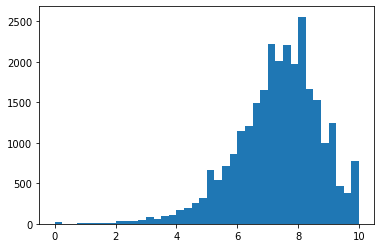

In [50]:
plt.hist(dfFinal['LifeSatisfaction0'], bins = 40)
plt.show()

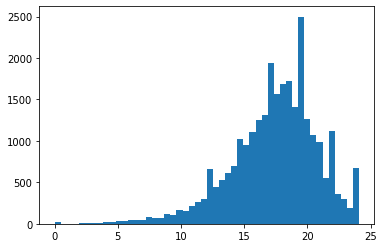

In [51]:
plt.hist(dfFinal['LifeSatisfaction1'], bins = 50)
plt.show()

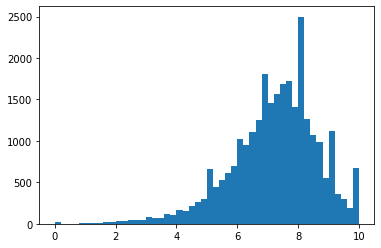

In [52]:
plt.hist(dfFinal['LifeSatisfaction2'], bins = 50)
plt.show()

In [53]:
dfFinal.head()

,Year,HHId,HHHolidays,HHFood,HHReserves,HHPhone,HHTV,HHComputer,HHWashMachine,HHCar,AREMonth,HousingCost,HHHeath,HHnMembers,HHConsUnits,vhRentaa,vhRentaAIa,vhPobreza,vhMATDEP,Year_HHid,Region,Habitat,IndID,Sex,YBirht,MarStatus,WorStatus,FStudies,CHealth,CrConditions,HLimitations,MDClothes,MDShoes,MDFriends,MDLeisure,MDSelf,MDInternet,FFTense,FFDown,FFCalm,FFDepressed,FFHappy,WSOovsat,WBSrelations,WBSowntime,WSBeconomy,Year_IndID,AgeNumeric,HHHolidays_No,HHHolidays_Yes,HHFood_Yes,HHReserves_Yes,HHPhone_Unknown / Not Declared,HHPhone_Yes,HHTV_Yes,HHComputer_Unknown / Not Declared,HHComputer_Yes,HHWashMachine_Yes,HHCar_Unknown / Not Declared,HHCar_Yes,HousingCost_HighImpactHH,HousingCost_LowImpactHH,HousingCost_MediumImpactHH,HousingCost_Unknown / Not Declared,HHHeath_Yes,vhPobreza_Unknown / Not Declared,vhPobreza_vhPobreza_No,vhPobreza_vhPobreza_Yes,vhMATDEP_vhMATDEP_No,Sex_Hombre,Sex_Mujer,MarStatus_Casado,MarStatus_Divorciado,MarStatus_Separado,MarStatus_Soltero,MarStatus_Uknown / Prefer not to say,MarStatus_Viudo,WorStatus_EmployeeFT,WorStatus_EmployeePT,WorStatus_HHoldKeeper,WorStatus_OtherNonWorking,WorStatus_Retired,WorStatus_SEmployedFT,WorStatus_SEmployedPT,WorStatus_Student,WorStatus_Uknown / Not declared,WorStatus_Unemployed,FStudies_<Primaria,FStudies_EdSuperior,FStudies_OrGeneral,FStudies_OrProfesional,FStudies_Primaria,FStudies_Secundaria1,FStudies_Secundaria2,FStudies_SecundariaNoOb,FStudies_Uknown,CrConditions_NChronic,CrConditions_Unknown / Not Declared,CrConditions_YChronic,HLimitations_NoLimited,HLimitations_NoSerLimitedG_limitado,HLimitations_SerLimited,HLimitations_Unknown / Not declared,MDClothes_No affordable,"MDClothes_No, other reason",MDClothes_Unknown / Not Declared,MDClothes_Yes,MDShoes_No affordable,"MDShoes_No, other reason",MDShoes_Unknown / Not Declared,MDShoes_Yes,MDFriends_No affordable,"MDFriends_No, other reason",MDFriends_Unknown / Not Declared,MDFriends_Yes,MDLeisure_No affordable,"MDLeisure_No, other reason",MDLeisure_Unknown / Not Declared,MDLeisure_Yes,MDSelf_No affordable,"MDSelf_No, other reason",MDSelf_Unknown / Not Declared,MDSelf_Yes,MDInternet_No affordable,"MDInternet_No, other reason",MDInternet_Unknown / Not Declared,MDInternet_Yes,LifeSatisfaction0,LifeSatisfaction1,LifeSatisfaction2
0,2004,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,MediumImpactHH,Yes,3,1.8,40821.0,44829.02,vhPobreza_No,vhMATDEP_No,2004_1,País Vasco,Small,101,Hombre,1964,Casado,Uknown / Not declared,Uknown,2.0,NChronic,NoLimited,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004_101,40,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN
1,2004,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,MediumImpactHH,Yes,3,1.8,40821.0,44829.02,vhPobreza_No,vhMATDEP_No,2004_1,País Vasco,Small,102,Mujer,1967,Casado,Uknown / Not declared,Uknown,2.0,NChronic,NoLimited,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004_102,37,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN
2,2004,2,No,Yes,Yes,Yes,Yes,Unknown / Not Declared,Yes,Unknown / Not Declared,2.0,HighImpactHH,Yes,1,1.0,5068.0,7665.90,vhPobreza_Yes,vhMATDEP_No,2004_2,País Vasco,Small,201,Mujer,1941,Viudo,Uknown / Not declared,Uknown,4.0,YChronic,NoLimited,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,Unknown / Not Declared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004_201,63,1,0,1,1,0,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,NaN,NaN,N

In [54]:
dfFinal.to_csv('./Files/ECV_2004_2018V2.csv.gz', sep = ';', index = False, compression="gzip")